In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = Path("..") / "data"
resale_price = pd.read_csv(data_dir / "resale_price_train.csv")
resale_price["month"] = pd.to_datetime(resale_price["month"])
median_income = pd.read_csv(data_dir / "median_income_data_train.csv")
median_income["year"] = pd.to_datetime(median_income["year"], format="%Y")

In [3]:
resale_price.info()
resale_price.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   town          7049 non-null   object        
 1   month         7049 non-null   datetime64[ns]
 2   resale_price  7049 non-null   float64       
 3   price_diff    7023 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 220.4+ KB


,town,month,resale_price,price_diff
0,ANG MO KIO,2000-01-01,226608.0,NaN
1,ANG MO KIO,2000-02-01,218060.0,-8548.0
2,ANG MO KIO,2000-03-01,225270.0,7210.0
3,ANG MO KIO,2000-04-01,225847.0,577.0
4,ANG MO KIO,2000-05-01,217008.0,-8839.0


In [4]:
resale_price.describe()


,month,resale_price,price_diff
count,7049,7049.00000,7023.000000
mean,2011-08-14 08:22:32.362037248,387229.89573,1149.821871
min,2000-01-01 00:00:00,134500.00000,-410000.000000
25%,2006-01-01 00:00:00,265435.00000,-10404.500000
50%,2011-09-01 00:00:00,394304.00000,1170.000000
75%,2017-05-01 00:00:00,471931.00000,12963.500000
max,2022-12-01 00:00:00,956760.00000,394333.000000
std,NaN,129829.94385,37009.741091


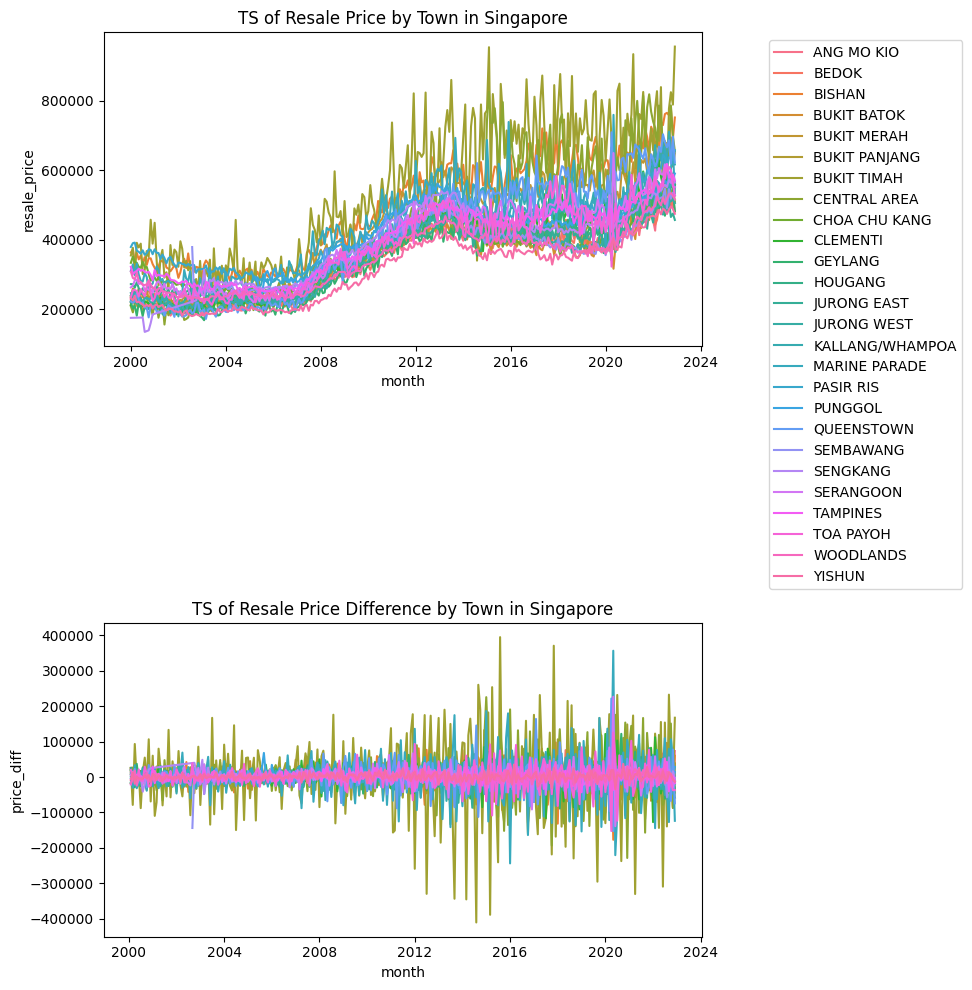

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
sns.lineplot(data=resale_price, x="month", y="resale_price", hue="town", ax=axes[0])
axes[0].legend(loc='center left', bbox_to_anchor=(1.1, 0.1))
axes[0].set_title("TS of Resale Price by Town in Singapore")

sns.lineplot(data=resale_price, x="month", y="price_diff", hue="town", ax=axes[1])
# remove legend
axes[1].legend_.remove()
axes[1].set_title("TS of Resale Price Difference by Town in Singapore")

plt.tight_layout()
plt.savefig(Path("..") / "asset" / "resale_price_ts.png")

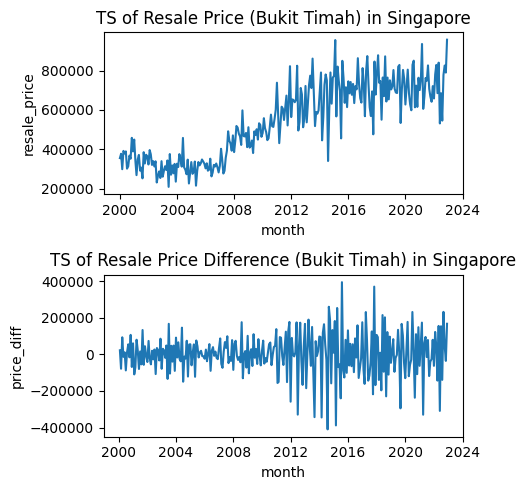

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(5, 5))
sns.lineplot(data=resale_price.query("town == 'BUKIT TIMAH'"), x="month", y="resale_price", hue="town", ax=axes[0])
axes[0].legend_.remove()
axes[0].set_title("TS of Resale Price (Bukit Timah) in Singapore")

sns.lineplot(data=resale_price.query("town == 'BUKIT TIMAH'"), x="month", y="price_diff", hue="town", ax=axes[1])
# remove legend
axes[1].legend_.remove()
axes[1].set_title("TS of Resale Price Difference (Bukit Timah) in Singapore")

plt.tight_layout()
plt.savefig(Path("..") / "asset" / "resale_price_bukit_timah_ts.png")

In [7]:
median_income.info()
median_income.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   year         21 non-null     datetime64[ns]
 1   income       21 non-null     int64         
 2   income_diff  20 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 636.0 bytes


,year,income,income_diff
0,2001-01-01,2387,NaN
1,2002-01-01,2380,-7.0
2,2003-01-01,2410,30.0
3,2004-01-01,2326,-84.0
4,2006-01-01,2449,123.0


In [8]:
median_income.describe()

,year,income,income_diff
count,21,21.000000,20.000000
mean,2011-10-23 19:25:42.857142784,3478.285714,134.150000
min,2001-01-01 00:00:00,2326.000000,-84.000000
25%,2007-01-01 00:00:00,2543.000000,56.250000
50%,2012-01-01 00:00:00,3480.000000,124.500000
75%,2017-01-01 00:00:00,4232.000000,210.000000
max,2022-01-01 00:00:00,5070.000000,390.000000
std,NaN,899.202766,121.487827


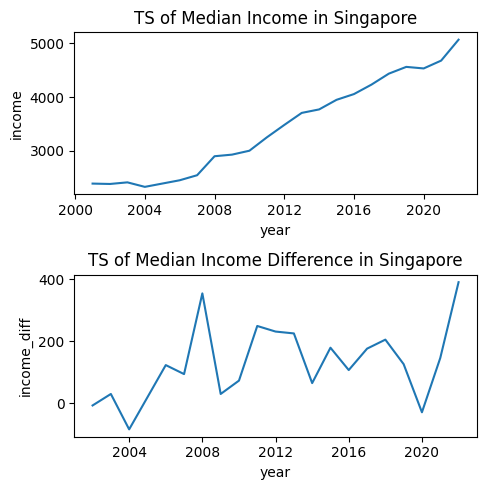

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(5, 5))

sns.lineplot(data=median_income, x="year", y="income", ax=axes[0])
axes[0].set_title("TS of Median Income in Singapore")

sns.lineplot(data=median_income, x="year", y="income_diff", ax=axes[1])
axes[1].set_title("TS of Median Income Difference in Singapore")

plt.tight_layout()
plt.savefig(Path("..") / "asset" / "median_income_ts.png")